In [1]:
import os

In [2]:
os.chdir('../..')

In [3]:
import tensorflow as tf

In [10]:
from importlib import reload

In [11]:
reload(da)

<module 'dev.python.utils.data_augmentation' from '/home/app/dev/python/utils/data_augmentation.py'>

# Prep

## Loading Model

In [4]:
# @keras.utils.register_keras_serializable
model = tf.keras.models.load_model('data/model/TinyYolo_60')

## Load img

In [5]:
import cv2
import dev.python.utils.data_augmentation as da
import PIL
import PIL.Image as Image
import numpy as np
import random

In [6]:
import imgaug as ia
import imgaug.augmenters as iaa

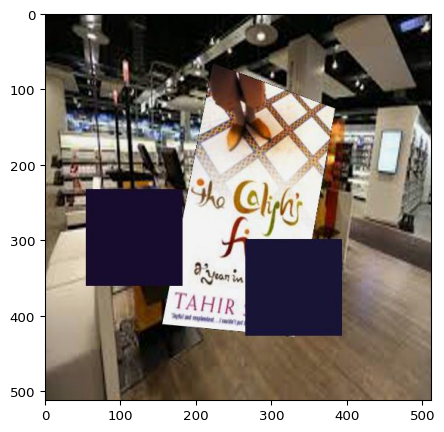

In [7]:
augmented_img_dir = 'data/output/tests/augmented_covers/'
augmented_img_file = os.listdir(augmented_img_dir)[0]
augmented_img_path = augmented_img_dir+augmented_img_file
augmented_img = cv2.imread(augmented_img_path)
ia.imshow(augmented_img[:, :, ::-1])

# Eval

In [8]:
im, points = da.read_augmented_img_filename(augmented_img_path)
im, points

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7FF83F5E4EB8>,
 array([[222,  67],
        [384, 126],
        [155, 412],
        [330, 428]]))

In [9]:
points.reshape(8)

array([222,  67, 384, 126, 155, 412, 330, 428])

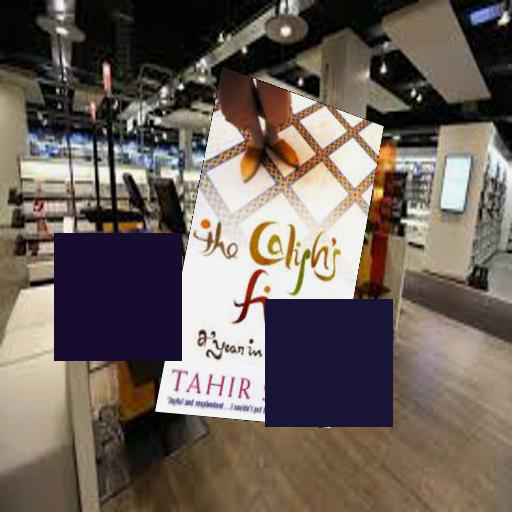

In [10]:
im

In [19]:
im_t = da.draw_circles(np.array(im), points)
im_t.shape

(512, 512, 3)

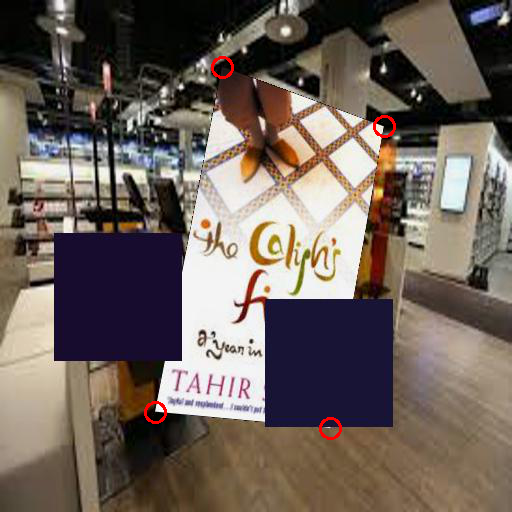

In [20]:
Image.fromarray(im_t)

## Pred

In [11]:
im_in = np.array(im).reshape(1, 512, 512, 3)
im_in.shape

(1, 512, 512, 3)

In [12]:
#im_in_t = np.repeat(im_in, repeats=64, axis=0)
#im_in_t.shape

In [13]:
im_out_t1 = model(im_in/255)
im_out_t1.shape, im_out_t1

(TensorShape([1, 9]),
 <tf.Tensor: shape=(1, 9), dtype=float32, numpy=
 array([[0.39335936, 0.13020721, 0.7412474 , 0.24422652, 0.21825415,
         0.77226615, 0.628     , 0.8151194 , 0.9999826 ]], dtype=float32)>)

In [14]:
p = (im_out_t1.numpy()[0][:8]*512).astype(np.uint8).reshape(4, 2)
p

array([[201,  66],
       [123, 125],
       [111, 139],
       [ 65, 161]], dtype=uint8)

In [22]:
from dev.python.training.losses import MSE_MSLE as loss

In [24]:
img_batch = im_in

In [36]:
points.reshape(8)/512

array([0.43359375, 0.13085938, 0.75      , 0.24609375, 0.30273438,
       0.8046875 , 0.64453125, 0.8359375 ])

In [28]:
true_label = np.concatenate((np.concatenate(np.array(list(zip(points[:,0]/img_batch[-1].shape[-3], points[:,1]/img_batch[-1].shape[-2])))), np.array([1])))
true_label

array([0.43359375, 0.13085938, 0.75      , 0.24609375, 0.30273438,
       0.8046875 , 0.64453125, 0.8359375 , 1.        ])

In [30]:
im_out_t1.numpy()

array([[1.000000e+00, 0.000000e+00, 1.000000e+00, 7.210438e-28,
        0.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00]], dtype=float32)

In [34]:
loss(true_label.reshape(1, 9), im_out_t1.numpy())

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.093009], dtype=float32)>

In [15]:
im_t = da.draw_circles(np.array(im), p)
im_t.shape

(512, 512, 3)

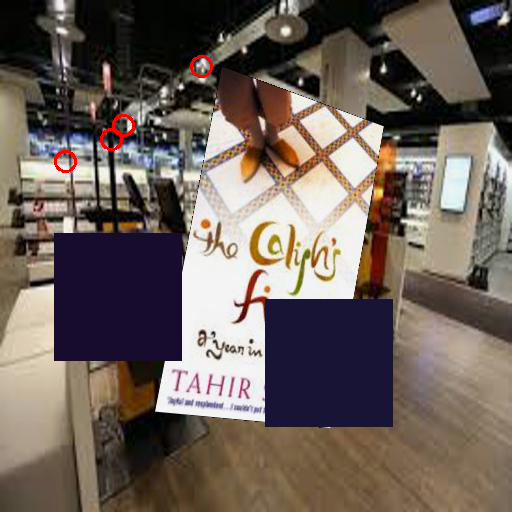

In [16]:
Image.fromarray(im_t)